In [34]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [35]:
file_name = 'loan.csv'

In [36]:
df= pd.read_csv('loan.csv', low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['bucket'] = round(df['funded_amnt']/1000)*1000

In [38]:
rows = df.index
row_count = len(rows)
random.shuffle(list(rows))

df.reindex(rows)

training_data = df[row_count // 10:]
testing_data = df[:row_count // 10]

In [39]:
testing_data.shape

(88737, 75)

In [40]:
training_data.shape

(798642, 75)

In [41]:
#I want to predict annual income to target
df1 = testing_data[['dti','funded_amnt','purpose']]

In [45]:
df1['bucket'] = round(df1['funded_amnt']/1000)*1000

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
df1

,dti,funded_amnt,purpose,bucket
0,27.65,5000.0,credit_card,5000.0
1,1.00,2500.0,car,2000.0
2,8.72,2400.0,small_business,2000.0
3,20.00,10000.0,other,10000.0
4,17.94,3000.0,other,3000.0
5,11.20,5000.0,wedding,5000.0
6,23.51,7000.0,debt_consolidation,7000.0
7,5.35,3000.0,car,3000.0
8,5.55,5600.0,small_business,6000.0
9,18.08,5375.0,other,5000.0


In [64]:

df1_bucketed = df1.groupby('bucket', as_index=False).mean()

In [65]:
df1.shape

(88737, 4)

This section shows 10% of the data (sample pop.)

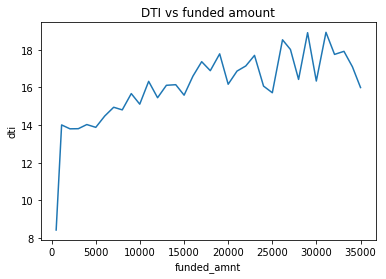

In [66]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('funded_amnt')
ax1.set_ylabel('dti')
ax1.set_title('DTI vs funded amount')
ax1.plot( 'funded_amnt','dti', data = df1_bucketed);
plt.show()

This sections shows 50%

In [54]:
rows = training_data.index
row_count = len(rows)
random.shuffle(list(rows))

training_data.reindex(rows)

training_data2 = training_data[row_count // 10:]
testing_data2 = training_data[:row_count // 10]

In [55]:
testing_data2.shape

(79864, 75)

In [56]:
df2 = testing_data2[['dti','funded_amnt','purpose']]

In [57]:
df2['bucket'] = round(df2['funded_amnt']/1000)*1000

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
df2_bucketed = df2.groupby('bucket', as_index=False).mean()

In [68]:
df2

,dti,funded_amnt,purpose,bucket
88737,32.58,7750.0,debt_consolidation,8000.0
88738,13.71,15000.0,home_improvement,15000.0
88739,25.44,10000.0,credit_card,10000.0
88740,22.52,18000.0,debt_consolidation,18000.0
88741,11.06,22000.0,other,22000.0
88742,24.21,7550.0,debt_consolidation,8000.0
88743,19.45,17200.0,credit_card,17000.0
88744,22.87,30000.0,debt_consolidation,30000.0
88745,27.12,5500.0,home_improvement,6000.0
88746,20.15,24000.0,debt_consolidation,24000.0


In [69]:
df2_bucketed = df1.groupby('bucket', as_index=False).mean()

In [70]:
df2.shape

(79864, 4)

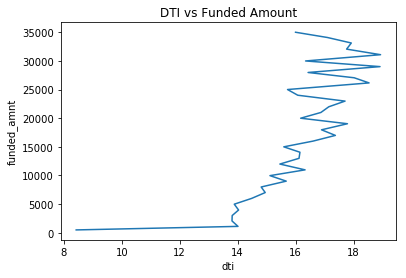

In [72]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('dti')
ax1.set_ylabel('funded_amnt')
ax1.set_title('DTI vs Funded Amount')
ax1.plot('dti', 'funded_amnt', data = df2_bucketed);
plt.show()

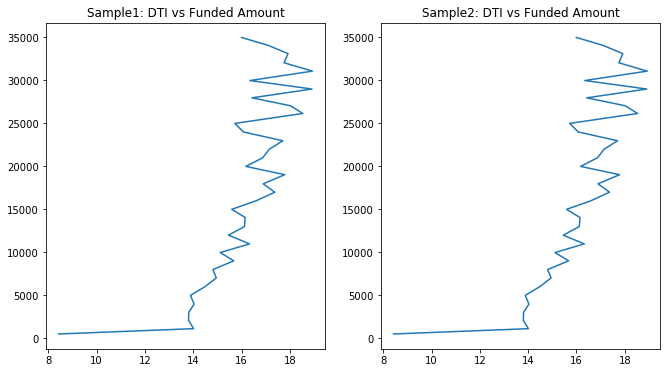

In [73]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (11,6));
axes[0].plot('dti', 'funded_amnt', data = df1_bucketed);
axes[0].set_title('Sample1: DTI vs Funded Amount');
axes[1].plot('dti', 'funded_amnt', data = df2_bucketed);
axes[1].set_title('Sample2: DTI vs Funded Amount');

In [5]:
rows = training_data.index
row_count = len(rows)
random.shuffle(list(rows))

training_data.reindex(rows)

training_data3 = training_data[row_count // 10:]
testing_data3 = training_data[:row_count // 10]

In [76]:
testing_data3.shape

(199660, 74)

In [6]:
df3 = testing_data3[['dti','funded_amnt']]

In [85]:
df3.head(5)

,dti,funded_amnt
88737,32.58,7750.0
88738,13.71,15000.0
88739,25.44,10000.0
88740,22.52,18000.0
88741,11.06,22000.0


In [86]:
df3['Rolling_Mean'] = df3['funded_amnt'].rolling(window = 80).mean()
df3.head(10)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,dti,funded_amnt,Rolling_Mean
88737,32.58,7750.0,NaN
88738,13.71,15000.0,NaN
88739,25.44,10000.0,NaN
88740,22.52,18000.0,NaN
88741,11.06,22000.0,NaN
88742,24.21,7550.0,NaN
88743,19.45,17200.0,NaN
88744,22.87,30000.0,NaN
88745,27.12,5500.0,NaN
88746,20.15,24000.0,NaN


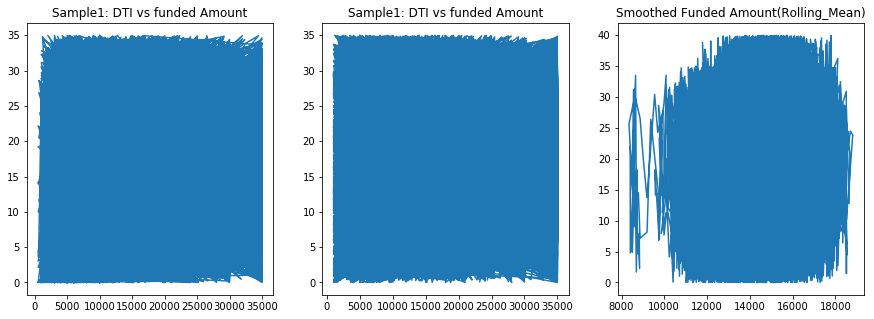

In [90]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('funded_amnt', 'dti', data = df1);
axes[0].set_title('Sample1: DTI vs funded Amount');
axes[1].plot('funded_amnt', 'dti', data = df2);
axes[1].set_title('Sample1: DTI vs funded Amount');
axes[2].plot( 'Rolling_Mean','dti', data = df3);
axes[2].set_title('Smoothed Funded Amount(Rolling_Mean)');

In [91]:
df3_keypar = df3[(df3['funded_amnt'] >= 5000) & (df3['funded_amnt'] <= 35000)] 


In [92]:
df3_keypar.head(5)

,dti,funded_amnt,Rolling_Mean
88737,32.58,7750.0,NaN
88738,13.71,15000.0,NaN
88739,25.44,10000.0,NaN
88740,22.52,18000.0,NaN
88741,11.06,22000.0,NaN


In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression().fit(df3_keypar[['dti']], df3_keypar[['funded_amnt']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
#print 'y = ', round(m[0],2), 'x + ', round(b[0],2) ~ get invalid syntax error so it didn't print go back and check on syntax 
# using the equation of the line to get y values
predicted_dti = model.predict(df3_keypar[['dti']])
predicted_dti[0:5]


array([[ 16039.6151259 ],
       [ 15387.69541811],
       [ 15792.94280404],
       [ 15692.06280686],
       [ 15296.14336588]])

In [95]:
predicted_dti = pd.DataFrame(data = predicted_dti, index = df3_keypar.index.values, columns = ['Predicted Funded Amount'])
predicted_dti.head(5)

,Predicted Funded Amount
88737,16039.615126
88738,15387.695418
88739,15792.942804
88740,15692.062807
88741,15296.143366


In [97]:
joined_df = df3_keypar.join(predicted_dti, how = 'inner')
joined_df.head()

,dti,funded_amnt,Rolling_Mean,Predicted Funded Amount
88737,32.58,7750.0,NaN,16039.615126
88738,13.71,15000.0,NaN,15387.695418
88739,25.44,10000.0,NaN,15792.942804
88740,22.52,18000.0,NaN,15692.062807
88741,11.06,22000.0,NaN,15296.143366


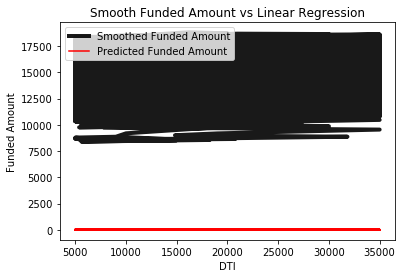

In [99]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['funded_amnt'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed Funded Amount');
ax.plot(joined_df['funded_amnt'], joined_df['dti'], color = (1,0,0), label = 'Predicted Funded Amount');
ax.set_title('Smooth Funded Amount vs Linear Regression')
ax.set_xlabel('DTI')
ax.set_ylabel('Funded Amount')
ax.legend(loc='upper left');

In [100]:
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['funded_amnt'],joined_df['dti'],multioutput='uniform_average')
r_squared

-3.9615926412186857

In [7]:
df3


,dti,funded_amnt
88737,32.58,7750.0
88738,13.71,15000.0
88739,25.44,10000.0
88740,22.52,18000.0
88741,11.06,22000.0
88742,24.21,7550.0
88743,19.45,17200.0
88744,22.87,30000.0
88745,27.12,5500.0
88746,20.15,24000.0


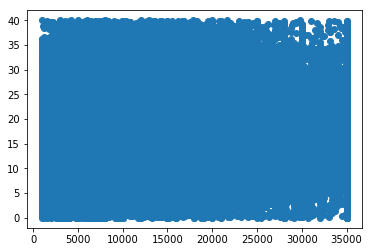

In [16]:
plt.scatter( 'funded_amnt','dti', data = df3);

In [28]:
df3['bucket'] = round(df3['funded_amnt']/1000)*1000

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df3

,dti,funded_amnt,bucket
88737,32.58,7750.0,8000.0
88738,13.71,15000.0,15000.0
88739,25.44,10000.0,10000.0
88740,22.52,18000.0,18000.0
88741,11.06,22000.0,22000.0
88742,24.21,7550.0,8000.0
88743,19.45,17200.0,17000.0
88744,22.87,30000.0,30000.0
88745,27.12,5500.0,6000.0
88746,20.15,24000.0,24000.0


In [31]:
df3_bucketed = df3.groupby('bucket', as_index=False).mean()

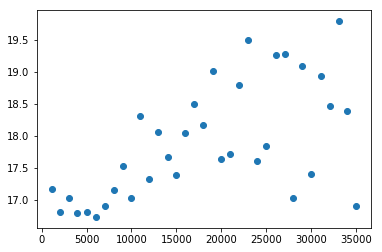

In [32]:
plt.scatter( 'funded_amnt','dti', data = df3_bucketed);

NameError: name 'df1' is not defined

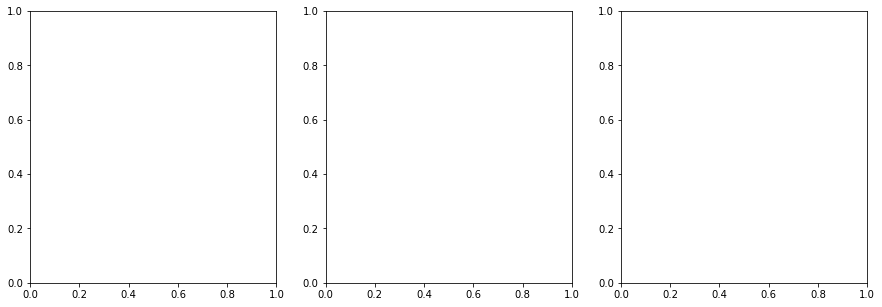

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('funded_amnt', 'dti', data = df1);
axes[0].set_title('Sample1: DTI vs funded Amount');
axes[1].plot('funded_amnt', 'dti', data = df2);
axes[1].set_title('Sample1: DTI vs funded Amount');
axes[2].plot( 'funded_amnt','dti', data = df3_bucketed);
axes[2].set_title('Smoothed Funded Amount(Rolling_Mean)');